<h1 style="font-size:3rem;color:#A3623B;">Lab 1 - Joris LIMONIER</h1>

<h2> Generation and visualization of data</h2>

<h3> 1.1. Synthetic data</h3>

In [1]:
#we import all the required libraries
import numpy as np
import matplotlib.pyplot as plt # for plotting stuff
from random import seed, shuffle
from scipy.stats import multivariate_normal # for generating synthetic data 
from sklearn import datasets # for real datasets
import pandas as pd
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)

In [2]:
def generate_synthetic_data(
    n_samples1 = 10, # generate these many data points for class1
    n_samples2 = 10, # generate these many data points for class2
    mu1 = [2, 2],
    sigma1 = [[5, 1], [1, 5]],
    mu2 = [-2,-2],
    sigma2 = [[10, 1], [1, 3]]
    ):
    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
        
    """
    
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y

    """ Generate the features randomly """
    #For the NON-protected group (men)
    # We will generate one gaussian cluster for each class

    nv1, X1, y1= gen_gaussian(int(n_samples1), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples2),mu2, sigma2, 0) # negative class

    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))

    # shuffle the data
    perm = list(range(0,n_samples1 + n_samples2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    
    return X,y

In [3]:
X_syn, y_syn = generate_synthetic_data() 

In [4]:
print(X_syn)
print(y_syn)

[[-1.75227743  0.46427581]
 [-3.06017164 -5.33162345]
 [ 6.37824414 -2.20331545]
 [ 0.75082049  0.15112142]
 [ 2.52389828  4.28677199]
 [ 1.45650009  1.73493218]
 [ 4.19572104  4.33668307]
 [-0.34200841  0.57161057]
 [ 3.72522189  0.24478133]
 [-3.13177091  0.80921212]
 [ 2.17757635 -2.0595154 ]
 [ 3.13943753  4.42023136]
 [ 1.17846162 -2.0563402 ]
 [-5.15509615 -2.3786229 ]
 [-2.82893845 -3.29513223]
 [ 3.34152678  4.50415125]
 [-3.85571356 -0.78087953]
 [ 0.99760408  1.76102429]
 [-0.84763091 -1.20541586]
 [-1.37993071 -4.70398534]]
[0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0]


In [5]:
def plot_syn_data(X_syn, y_syn):
    plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
    plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")
    plt.legend(loc=2, fontsize=10)
    plt.show()

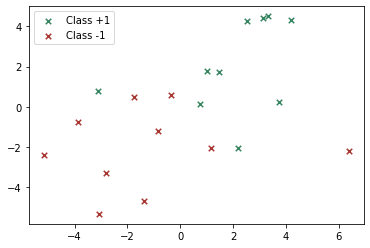

In [6]:
plot_syn_data(X_syn, y_syn)

### Question:
1-Is the data linearly separable?

No, there is no way to split the data using a straight line so that **no** data point is misclassified.

2-Play with parameters and plot the following cases:
    
    a)n=100, 50% of objects in Class -1, 50% in Class +1, linearly separable.
    b)n=100, 50% of objects in Class -1, 50% in Class +1, non-linearly separable.
    c)n=100, 40% of objects in Class -1, 60% in Class +1, linearly separable.
    d)n=100, 40% of objects in Class -1, 60% in Class +1, non-linearly separable.
    
    

### Your answer:
I modified the original function so that it can be called, passing custom values for mu1, mu2, sigma1, sigma2, as well as giving custom (possibly different) values for the number of samples in class -1 and in class +1). I also made the cell to plot into a function so that I can call it from other cells.

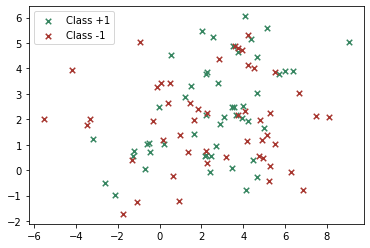

In [6]:
# a)
X_syn, y_syn = generate_synthetic_data(
    n_samples1=50,  # generate these many data points for class1
    n_samples2=50,  # generate these many data points for class2
    mu1=[2, 2],
    sigma1=[[5, 1], [1, 5]],
    mu2=[2, 2],
    sigma2=[[10, 1], [1, 3]]
)
plot_syn_data(X_syn, y_syn)


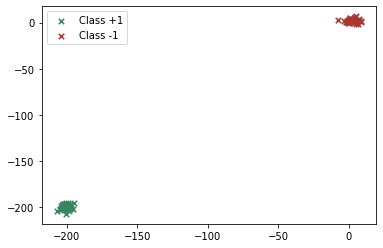

In [7]:
# b)
X_syn, y_syn = generate_synthetic_data(
    n_samples1=50,  # generate these many data points for class1
    n_samples2=50,  # generate these many data points for class2
    mu1=[-200, -200],
    sigma1=[[5, 1], [1, 5]],
    mu2=[2, 2],
    sigma2=[[10, 1], [1, 3]]
)
plot_syn_data(X_syn, y_syn)


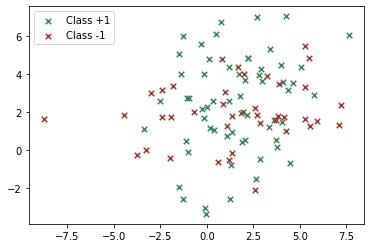

In [8]:
# c)
X_syn, y_syn = generate_synthetic_data(
    n_samples1=60,  # generate these many data points for class 1
    n_samples2=40,  # generate these many data points for class -1
    mu1=[2, 2],
    sigma1=[[5, 1], [1, 5]],
    mu2=[2, 2],
    sigma2=[[10, 1], [1, 3]]
)
plot_syn_data(X_syn, y_syn)


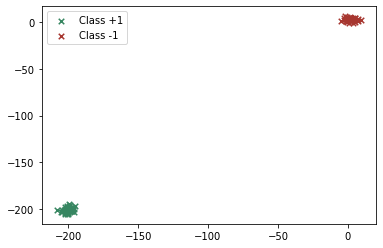

In [9]:
# d)
X_syn, y_syn = generate_synthetic_data(
    n_samples1=60,  # generate these many data points for class 1
    n_samples2=40,  # generate these many data points for class -1
    mu1=[-200, -200],
    sigma1=[[5, 1], [1, 5]],
    mu2=[2, 2],
    sigma2=[[10, 1], [1, 3]]
)
plot_syn_data(X_syn, y_syn)


<h3> 1.2. Real data: Iris dataset</h3>

In [10]:
iris = datasets.load_iris()
print(iris.data.shape)
print(iris.feature_names) #variables, features
print(iris.target_names) #classes
#print(iris)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


The iris dataset has $n=150$ objects in dimension $d=4$ with 3 classes. We will create a dataset in $d=2$ with only 2 classes.

In [11]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print(y.size)


100


Now let's visualize the data:

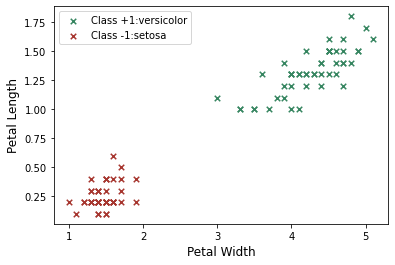

In [12]:
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:versicolor")
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("Petal Width", fontsize=12)
plt.ylabel("Petal Length", fontsize=12)
plt.legend(loc=2, fontsize=10)

plt.show()

In [13]:
#Now we normalize the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

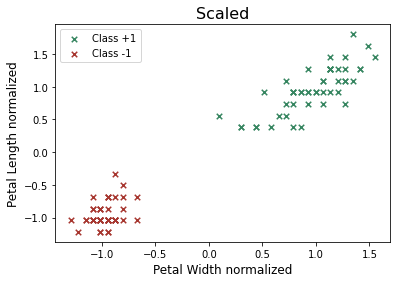

In [14]:
plt.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")

plt.xlabel("Petal Width normalized", fontsize=12)
plt.ylabel("Petal Length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.legend(loc=2, fontsize=10)

plt.show()

### Question:

Plot different examples by changing:

    a) The selected features.
    b) The selected classes.
    c) The selected features and classes.
    d) All the above normalized.

Pay attention to legend and axis labels, so that they reflect your choices. Include a brief explanation.

### Your answer:
Here is what I modify to answer each question
- `X = iris["data"][:, (i, j)]` where `i` and `j` allow us to choose features among `['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']`
- `plt.scatter(X[y==i][:, 0], X[y==i][:, 1])` where `i` allows us to choose species of iris among `['setosa' 'versicolor' 'virginica']`
- In order to normalize, we simply:
  - import `StandardScaler` with `from sklearn.preprocessing import StandardScaler`
  - set `scaler = StandardScaler()`
  - center and scale the data (`X`) with `X_scaled = scaler.fit_transform(X)`

100


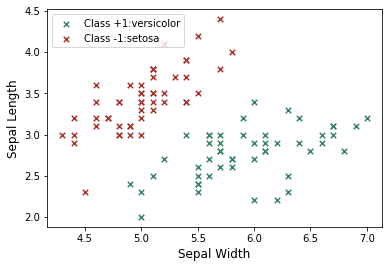

In [21]:
# a)
X = iris["data"][:, (0, 1)]  # sepal length, sepal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print(y.size)

plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:versicolor")
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("Sepal Width", fontsize=12)
plt.ylabel("Sepal Length", fontsize=12)
plt.legend(loc=2, fontsize=10)

plt.show()

100


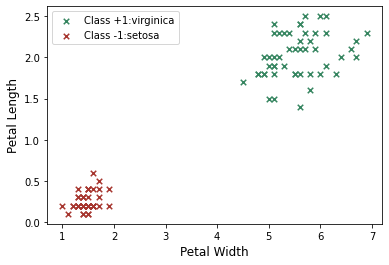

In [22]:
# b)
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_virginica = (y == 0) | (y == 2)
X = X[setosa_or_virginica]
y = y[setosa_or_virginica]
print(y.size)

plt.scatter(X[y==2][:, 0], X[y==2][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:virginica")
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("Petal Width", fontsize=12)
plt.ylabel("Petal Length", fontsize=12)
plt.legend(loc=2, fontsize=10)

plt.show()

100


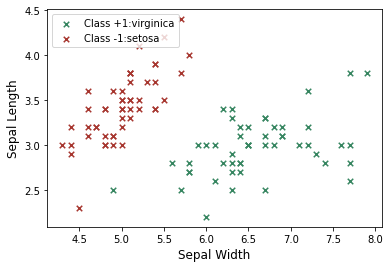

In [23]:
# c)
X = iris["data"][:, (0,1)]  # sepal length, sepal width
y = iris["target"]

setosa_or_virginica = (y == 0) | (y == 2)
X = X[setosa_or_virginica]
y = y[setosa_or_virginica]
print(y.size)

plt.scatter(X[y==2][:, 0], X[y==2][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:virginica")
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("Sepal Width", fontsize=12)
plt.ylabel("Sepal Length", fontsize=12)
plt.legend(loc=2, fontsize=10)

plt.show()

100


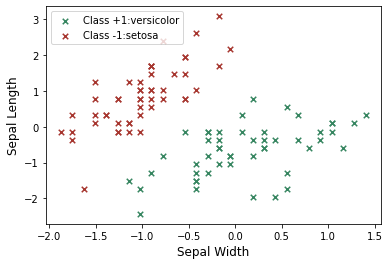

In [30]:
# d) Scaled version of a)

scaler = StandardScaler()
X = iris["data"][:, (0, 1)]  # sepal length, sepal width
X = scaler.fit_transform(X)
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print(y.size)

plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:versicolor")
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("Sepal Width", fontsize=12)
plt.ylabel("Sepal Length", fontsize=12)
plt.legend(loc=2, fontsize=10)

plt.show()

100


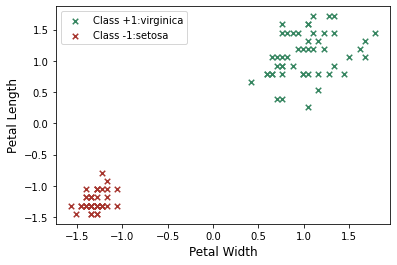

In [31]:

# d) Scaled version of b)

scaler = StandardScaler()
X = iris["data"][:, (2, 3)]  # petal length, petal width
X = scaler.fit_transform(X)
y = iris["target"]

setosa_or_virginica = (y == 0) | (y == 2)
X = X[setosa_or_virginica]
y = y[setosa_or_virginica]
print(y.size)

plt.scatter(X[y==2][:, 0], X[y==2][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:virginica")
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("Petal Width", fontsize=12)
plt.ylabel("Petal Length", fontsize=12)
plt.legend(loc=2, fontsize=10)

plt.show()

100


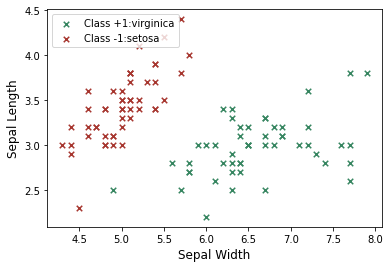

In [26]:
# d) Scaled version of c)

scaler = StandardScaler()
X = iris["data"][:, (0,1)]  # sepal length, sepal width
X = scaler.fit_transform(X)
y = iris["target"]

setosa_or_virginica = (y == 0) | (y == 2)
X = X[setosa_or_virginica]
y = y[setosa_or_virginica]
print(y.size)

plt.scatter(X[y==2][:, 0], X[y==2][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:virginica")
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("Sepal Width", fontsize=12)
plt.ylabel("Sepal Length", fontsize=12)
plt.legend(loc=2, fontsize=10)

plt.show()